In [8]:
# Set up connection to database
import psycopg2
engine = psycopg2.connect(
    database="stroke_dataset",
    user = "postgres",
    password = "bootcamp",
    host = "final-project.cpi4gz0jwsu4.us-west-1.rds.amazonaws.com",
    port = '5432'
    )

cursor = engine.cursor()

In [12]:
# Pull in working dataset from database
import pandas as pd
sql = """
SELECT "FIPS", "Num_Per_100k", "State", "County", "Percent_Smokers", "Percent_Obese", "Food_Environment_Index", "Percent_Access_Exercise", "Primary_Care_Physician_Rate", "Mental_Health_Providers_Rate", "Percent_Some_College", "Percent_Unemployed", "Income_Inequality_Ratio", "Violent_Crime_Rate", "Average_Daily_Air_Polution_Particle_Matter", "Percent_Long_Commute_Drives_Alone", "Percent_Rural"
FROM public."All_Data"
"""

all_data_df = pd.read_sql(sql, con=engine)
all_data_df.head()

,FIPS,Num_Per_100k,State,County,Percent_Smokers,Percent_Obese,Food_Environment_Index,Percent_Access_Exercise,Primary_Care_Physician_Rate,Mental_Health_Providers_Rate,Percent_Some_College,Percent_Unemployed,Income_Inequality_Ratio,Violent_Crime_Rate,Average_Daily_Air_Polution_Particle_Matter,Percent_Long_Commute_Drives_Alone,Percent_Rural
0,1001.0,107.0,Alabama,Autauga,19.0,36.0,7.1,71.0,45.0,13.0,61.9,5.3,4.4,266.0,10.8,41.0,42.0
1,1003.0,82.5,Alabama,Baldwin,17.0,29.0,7.9,69.0,73.0,89.0,63.8,5.4,4.6,217.0,9.6,40.0,42.3
2,1005.0,96.1,Alabama,Barbour,22.0,44.0,5.5,53.0,42.0,8.0,39.7,8.6,5.9,329.0,10.1,35.0,67.8
3,1007.0,112.3,Alabama,Bibb,20.0,38.0,7.6,49.0,53.0,9.0,49.8,6.6,4.2,147.0,10.5,49.0,68.4
4,1009.0,96.1,Alabama,Blount,20.0,36.0,8.5,32.0,21.0,9.0,53.9,5.5,4.1,212.0,11.3,60.0,90.0


In [24]:
all_data_df.shape

(2645, 17)

In [14]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [25]:
# Check for null values
all_data_df.isnull().sum()

FIPS                                          0
Num_Per_100k                                  0
State                                         0
County                                        0
Percent_Smokers                               0
Percent_Obese                                 0
Food_Environment_Index                        0
Percent_Access_Exercise                       0
Primary_Care_Physician_Rate                   0
Mental_Health_Providers_Rate                  0
Percent_Some_College                          0
Percent_Unemployed                            0
Income_Inequality_Ratio                       0
Violent_Crime_Rate                            0
Average_Daily_Air_Polution_Particle_Matter    0
Percent_Long_Commute_Drives_Alone             0
Percent_Rural                                 0
dtype: int64

In [26]:
# Drop null values
all_data_df = all_data_df.dropna(axis=0)

In [27]:
# Drop identifier columns
all_data_usable_df = all_data_df.drop(["FIPS", "State", "County"], 1)
all_data_usable_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Num_Per_100k,Percent_Smokers,Percent_Obese,Food_Environment_Index,Percent_Access_Exercise,Primary_Care_Physician_Rate,Mental_Health_Providers_Rate,Percent_Some_College,Percent_Unemployed,Income_Inequality_Ratio,Violent_Crime_Rate,Average_Daily_Air_Polution_Particle_Matter,Percent_Long_Commute_Drives_Alone,Percent_Rural
0,107.0,19.0,36.0,7.1,71.0,45.0,13.0,61.9,5.3,4.4,266.0,10.8,41.0,42.0
1,82.5,17.0,29.0,7.9,69.0,73.0,89.0,63.8,5.4,4.6,217.0,9.6,40.0,42.3
2,96.1,22.0,44.0,5.5,53.0,42.0,8.0,39.7,8.6,5.9,329.0,10.1,35.0,67.8
3,112.3,20.0,38.0,7.6,49.0,53.0,9.0,49.8,6.6,4.2,147.0,10.5,49.0,68.4
4,96.1,20.0,36.0,8.5,32.0,21.0,9.0,53.9,5.5,4.1,212.0,11.3,60.0,90.0


In [18]:
# https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/
 import pandas as pd
 import numpy as np
 import statsmodels.api as sm
 import matplotlib.pyplot as plt 
 %matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
# Split our preprocessed data into our features and target arrays
y = all_data_usable_df["Num_Per_100k"].values
#X = all_data_usable_df.drop("Num_Per_100k", 1).values
X = all_data_usable_df["Percent_Smokers"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1)

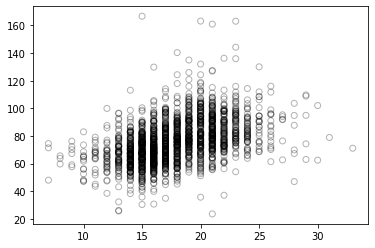

In [54]:
# Visualize relationship
plt.scatter(X_train, y_train, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = X_train.reshape(-1,1)
model = LinearRegression()
model.fit(x, y_train)
print(model.coef_)
print(model.intercept_)

[1.9834604]
40.5735031059466


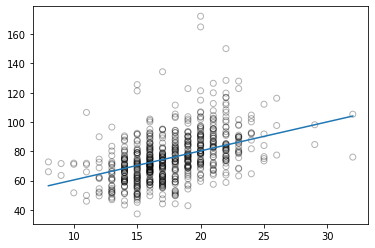

In [56]:
# Prediction on validation dataset
X_test = X_test.reshape(-1,1)
pred = model.predict(X_test)

# Visualization
# We will use plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(X_test.min(),X_test.max())
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, pred))
print(rms)

14.841487083034124


[ 5.97290496e-04 -6.10274544e-02  2.06267872e+00 -2.61887664e+01
  1.73434557e+02]


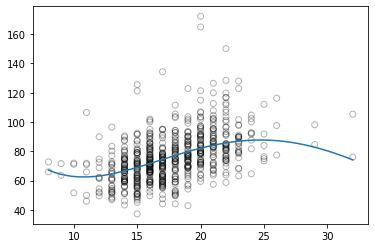

In [58]:
# Generating weights for polynomial function with degree
weights = np.polyfit(X_train, y_train, 4)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(X_test)

# We will plot the graph
xp = np.linspace(X_test.min(),X_test.max())
pred_plot = model(xp)
plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Compile, Train, Evaluate
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 66
hidden_nodes_layer2 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                137280    
                                                                 
 dense_1 (Dense)             (None, 3)                 201       
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 137,485
Trainable params: 137,485
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
323/323 [==============================] - 2s 3ms/step - loss: -7134.2773 - accuracy: 1.9354e-04
Epoch 2/50
323/323 [==============================] - 1s 3ms/step - loss: -124597.1875 - accuracy: 0.0000e+00
Epoch 3/50
323/323 [==============================] - 1s 3ms/step - loss: -547694.0625 - accuracy: 0.0000e+00
Epoch 4/50
323/323 [==============================] - 1s 3ms/step - loss: -1418679.1250 - accuracy: 0.0000e+00
Epoch 5/50
323/323 [==============================] - 1s 3ms/step - loss: -2835991.0000 - accuracy: 0.0000e+00
Epoch 6/50
323/323 [==============================] - 1s 3ms/step - loss: -4870333.5000 - accuracy: 0.0000e+00
Epoch 7/50
323/323 [==============================] - 1s 3ms/step - loss: -7577431.0000 - accuracy: 0.0000e+00
Epoch 8/50
323/323 [==============================] - 1s 3ms/step - loss: -10999278.0000 - accuracy: 0.0000e+00
Epoch 9/50
323/323 [==============================] - 1s 3ms/step - loss: -15166309.0000 - accuracy: 0.0000e+00
Epoc

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 0s - loss: -1.1959e+09 - accuracy: 0.0000e+00 - 311ms/epoch - 3ms/step
Loss: -1195853184.0, Accuracy: 0.0
